Лабораторная работа 1. (Квази) линейные методы классификации.

In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets, svm

#### 1. Загрузить таблицу Iris из репозитория UCI (можно из любого доступного источника: UCI, sklearn, kaggle). Поместить данные в объект DataFrame библиотеки pandas. Вычислить корреляции между признаками на всей таблице и отдельно по классам (использовать pd.groupby). Визуализировать распределения классов на всех парах переменных.


In [109]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['name'] = iris.target
iris_df['name'] = iris_df['name'].replace({0: iris['target_names'][0], 1: iris['target_names'][1], 2: iris['target_names'][2]})
iris_df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [110]:
iris_df.loc[:, 'sepal length (cm)':'petal width (cm)'].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [111]:
iris_df.loc[:,'sepal length (cm)':'name'].groupby('name').corr()

sepal length (cm)  sepal width (cm)  \
name                                                                
setosa     sepal length (cm)           1.000000          0.742547   
           sepal width (cm)            0.742547          1.000000   
           petal length (cm)           0.267176          0.177700   
           petal width (cm)            0.278098          0.232752   
versicolor sepal length (cm)           1.000000          0.525911   
           sepal width (cm)            0.525911          1.000000   
           petal length (cm)           0.754049          0.560522   
           petal width (cm)            0.546461          0.663999   
virginica  sepal length (cm)           1.000000          0.457228   
           sepal width (cm)            0.457228          1.000000   
           petal length (cm)           0.864225          0.401045   
           petal width (cm)            0.281108          0.537728   

                              petal length (cm)  petal width (cm)  
name                                                               
setosa     sepal length (cm)           0.267176          0.278098  
           sepal width (cm)            0.177700          0.232752  
           petal length (cm)           1.000000          0.331630  
           petal width (cm)            0.331630          1.000000  
versicolor sepal length (cm)           0.754049          0.546461  
           sepal width (cm)            0.560522          0.663999  
           petal length (cm)           1.000000          0.786668  
           petal width (cm)            0.786668          1.000000  
virginica  sepal length (cm)           0.864225          0.281108  
           sepal width (cm)            0.401045          0.537728  
           petal length (cm)           1.000000          0.322108  
           petal width (cm)            0.322108          1.000000

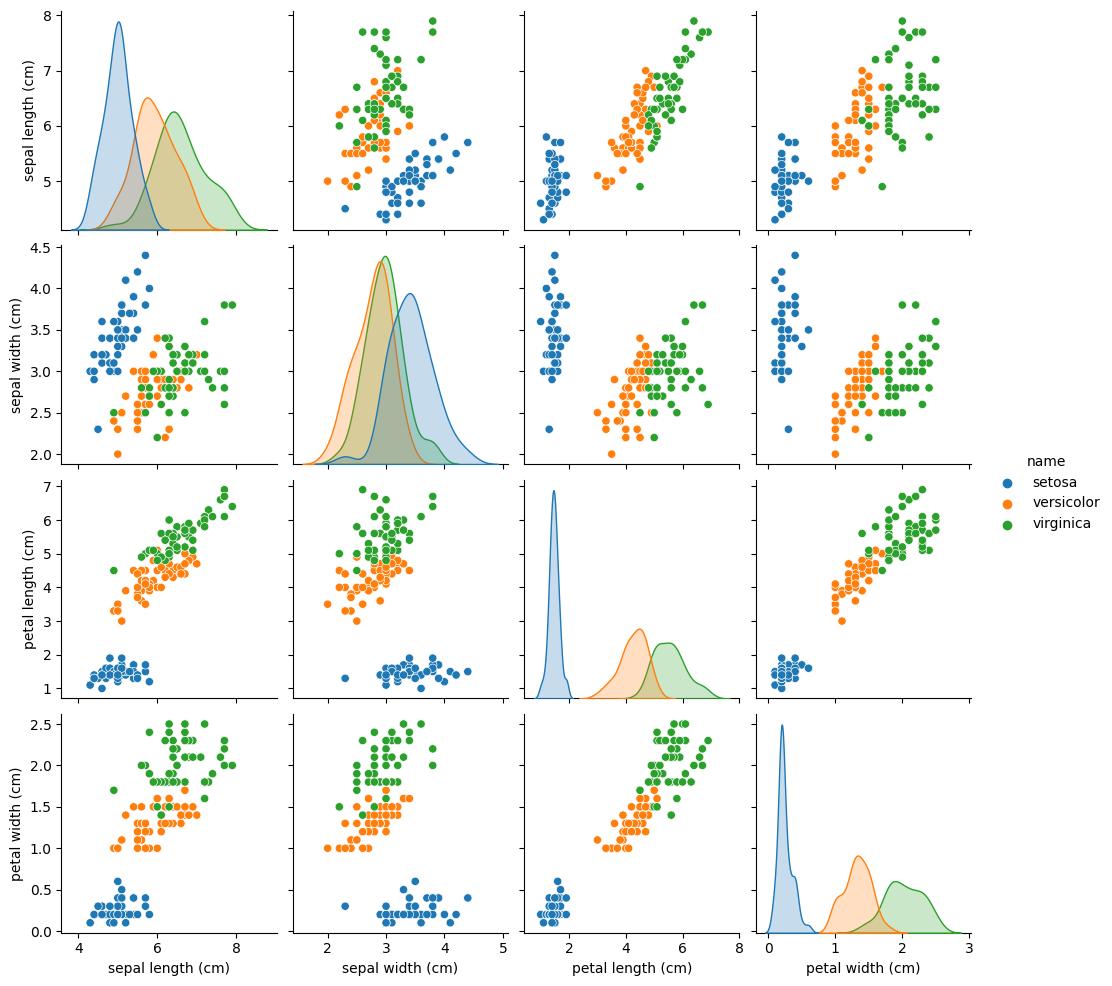

In [112]:
sns.pairplot(iris_df.loc[:,'sepal length (cm)':'name'], hue = 'name')

#### 2. Выбрать две переменные. Построить и визуализировать (показать разделяющую кривую) решения методами линейный и квадратичный дискриминант, логистическая регрессия, SVM (линейное и квадратичное ядро). Пример подходящей визуализации есть в sklearn.

In [130]:
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

Выберем две переменные

x - это выбранные переменные, а y - это соответствующие имена классов:
 0 - setosa,
 1 - versicolor,
 2 - virginica.

In [131]:
attributes = ['sepal length (cm)', 'petal width (cm)']
X = iris_df[attributes]
y = iris['target']


In [132]:
def draw(Z, title):
  plt.contourf(xx, yy, Z, alpha=0.8)
  plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor='k')
  plt.title(title)
  plt.xlabel(attributes[0])
  plt.ylabel(attributes[1])
  plt.show()


def training(clf):
  clf.fit(X, y)
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  return Z


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


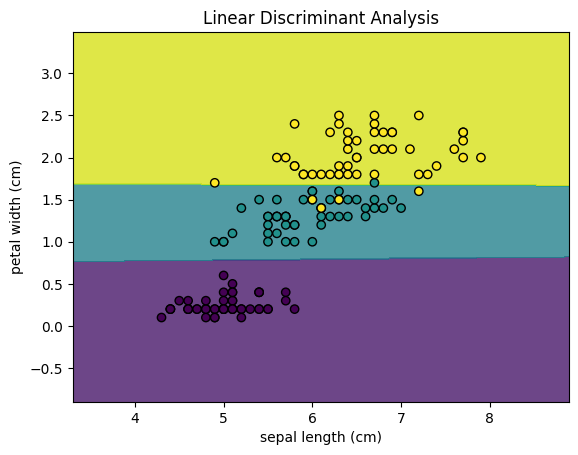

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


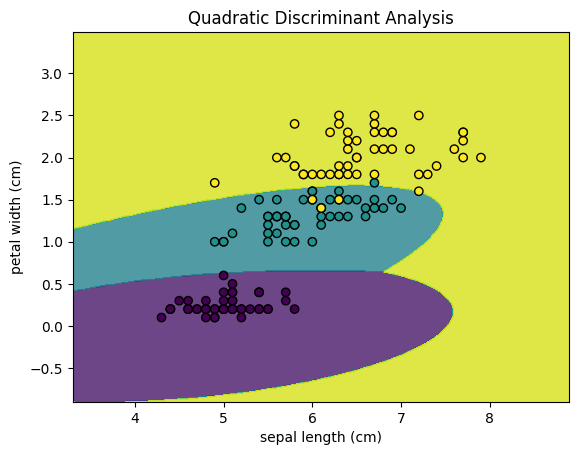

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


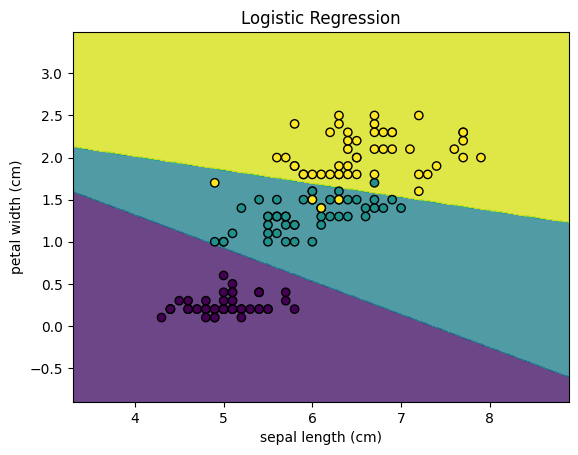

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


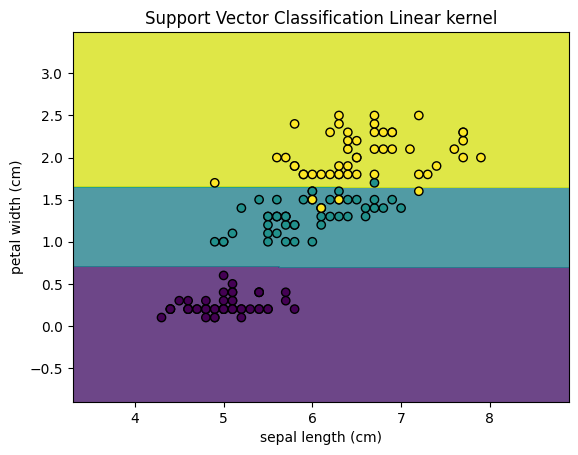

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


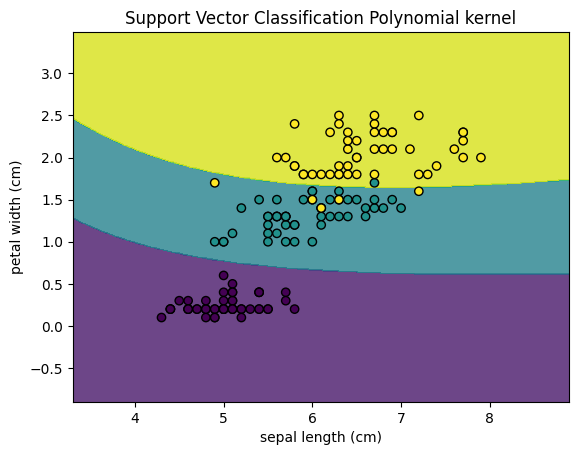

In [133]:
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

lda = LinearDiscriminantAnalysis()
Z_lda = training(lda)
draw(Z_lda, 'Linear Discriminant Analysis')

qda = QuadraticDiscriminantAnalysis()
Z_qda = training(qda)
draw(Z_qda, 'Quadratic Discriminant Analysis')

lr = LogisticRegression()
Z_lr = training(lr)
draw(Z_lr, 'Logistic Regression')

svm_linear = svm.SVC(kernel='linear')
Z_svm_linear = training(svm_linear)
draw(Z_svm_linear, 'Support Vector Classification Linear kernel')

svm_poly = svm.SVC(kernel='poly', degree=3)
Z_svm_poly = training(svm_poly)
draw(Z_svm_poly, 'Support Vector Classification Polynomial kernel')




#### 3. Построить линейный дискриминант на всех переменных. Визуализировать ответы алгоритма (выделить, например, цветом) и классы объектов (выделить, например, формой маркеров) во всех двумерных подпространствах.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


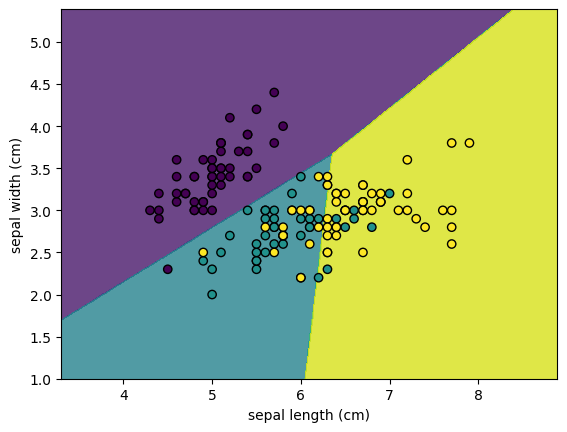

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


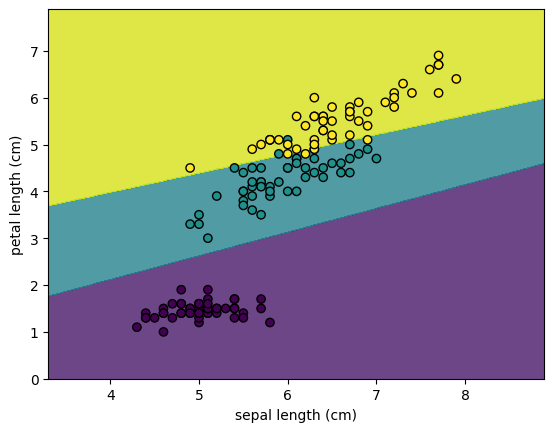

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


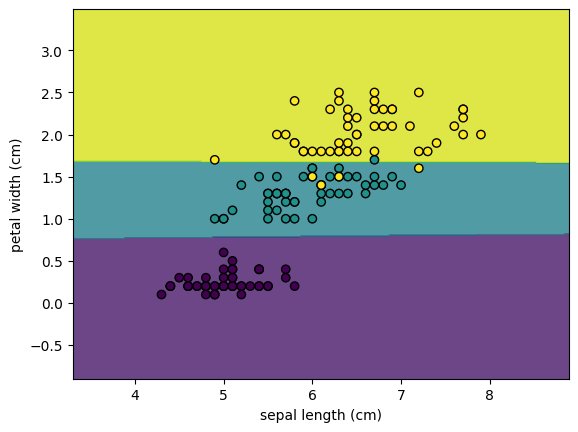

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


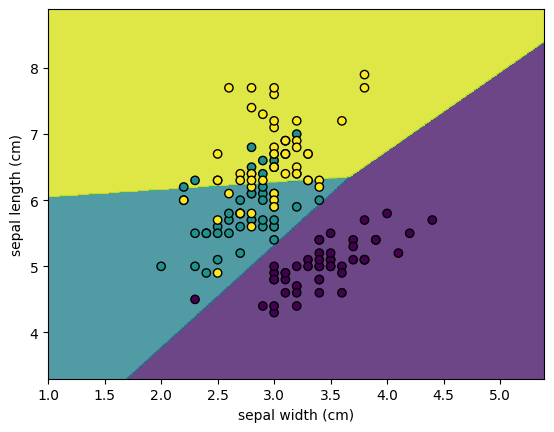

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


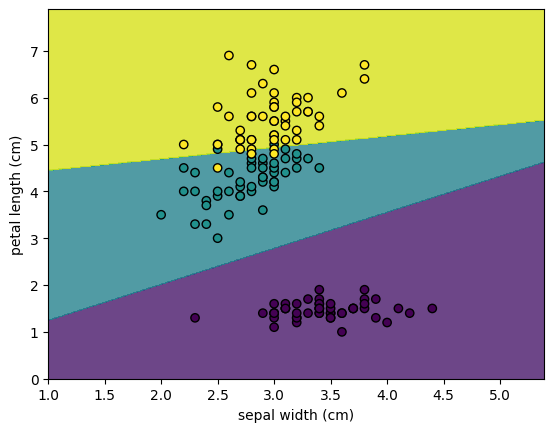

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


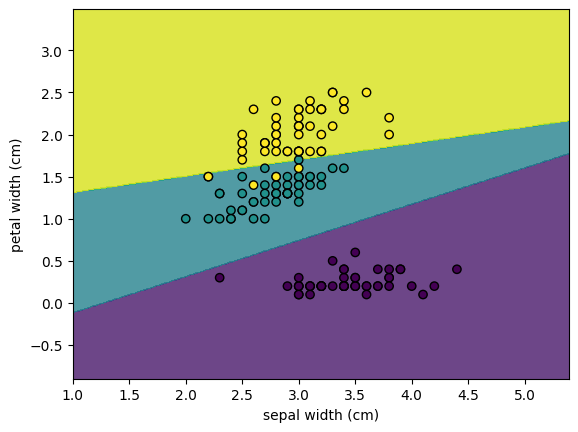

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


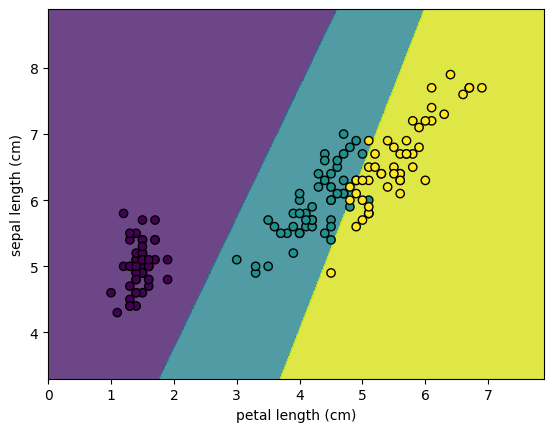

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


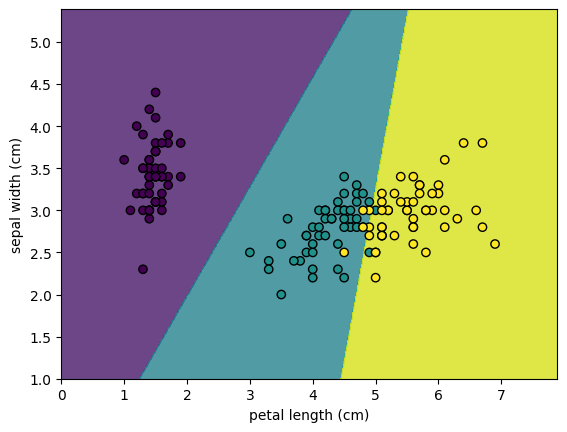

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


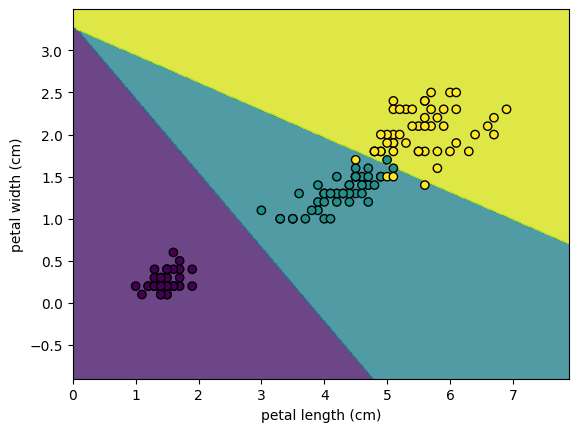

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


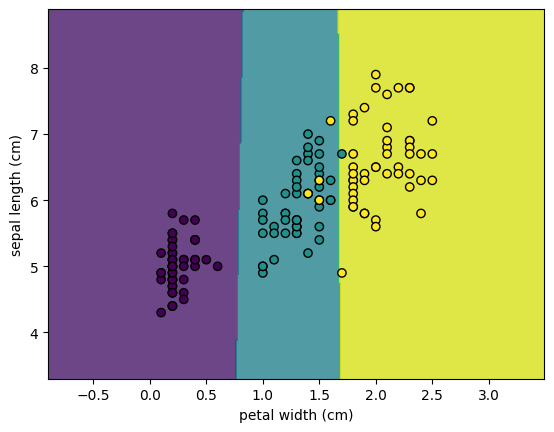

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


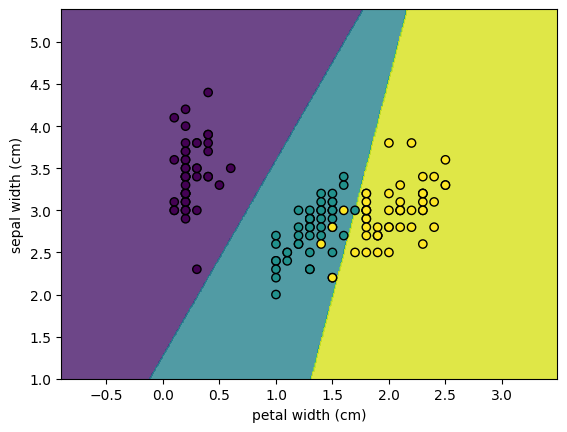

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


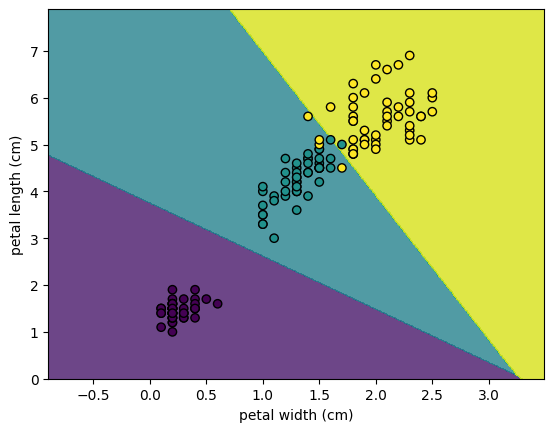

In [134]:
for i in range (4):
  for j in range (4):
    if i != j:
      attributes = [iris.feature_names[i], iris.feature_names[j]]
      X = iris_df[attributes]
      x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
      y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                          np.arange(y_min, y_max, 0.01))
      Z = training(LinearDiscriminantAnalysis())
      draw(Z, '')

plt.show()

#### 4. На двух переменных из п2 вычислить квадратичную разделяющую функцию непосредственно по оценкам ковариационных матриц и средних (самостоятельно реализовать метод, не используя готовый). Визуализировать её и сравнить с решением из п2.


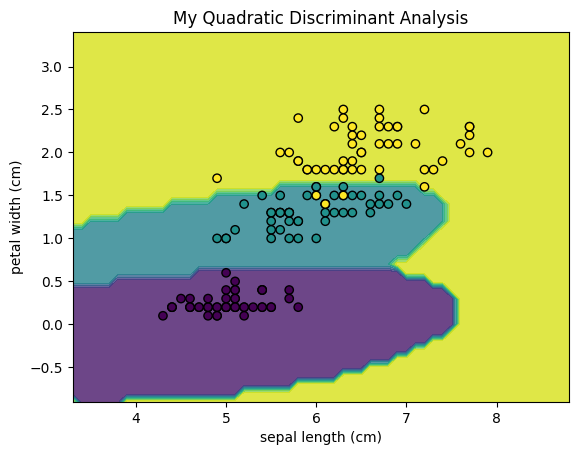

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


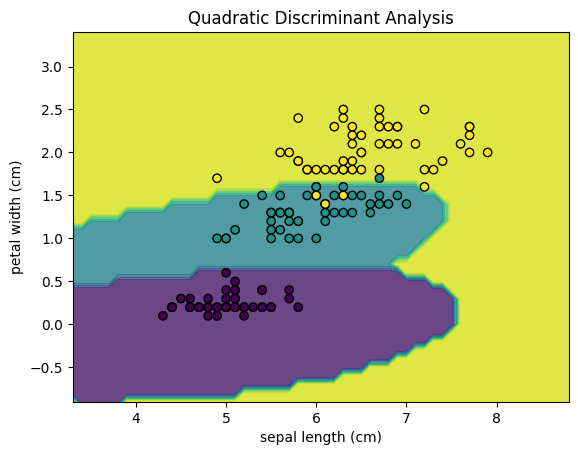

In [137]:
def quadratic_discriminant_function(x, cov, mean):
    x_diff = x - mean
    cov_inv = np.linalg.inv(cov)
    return -0.5 * np.dot(np.dot(x_diff, cov_inv), x_diff) - 0.5 * np.log(np.linalg.det(cov))

attributes = ['sepal length (cm)', 'petal width (cm)']
X = iris_df[attributes]
y = iris.target

covariances = []
means = []
for i in range(3):
    X_i = X[y == i]
    cov_i = np.cov(X_i.T)
    mean_i = np.mean(X_i, axis=0)
    covariances.append(cov_i)
    means.append(mean_i)

x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1)) #Слишком долго работает, поэтому сделала такую редкую сетку
Z = np.zeros(xx.shape + (3,))

for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        x = np.array([xx[i, j], yy[i, j]])
        for k in range(3):
            Z[i, j, k] = quadratic_discriminant_function(x, covariances[k], means[k])
Z = np.argmax(Z, axis=2)

draw(Z, 'My Quadratic Discriminant Analysis')

qda = QuadraticDiscriminantAnalysis()
Z_qda = training(qda)
draw(Z_qda, 'Quadratic Discriminant Analysis')
